### CDS NYU
### DS-GA 1007 | Programming for Data Science
### Lab 07
### October 23, 2024


# MatplotLib: Graphical Data Visualization

## Section Leaders

Dong Li  --  dl5214@nyu.edu  -- 

Ziyi (Ceci) Chen --  zc1634@nyu.edu  --


## Resources

* Concise textbook introduction to MatplotLib: ”Python Data Science Handbook” pp. 217-289, by Jake VanderPlas
    * Also accessible online at https://jakevdp.github.io/PythonDataScienceHandbook

* MatplotLib's freely acccessible, online, high-quality and concise documentation: https://matplotlib.org/stable/index.html

* Case Study:  https://swcarpentry.github.io/python-novice-inflammation/03-matplotlib/index.html


## 1. Import Matplotlib as a Library
Matplotlib has multiple backends which allows it to be used on a variety of platforms with a variety of GUI toolkits, all of them written so that most of the time, you will not need to care which backend you are using. There are also many different packages for different advanced types and/or styles of plots, that work with Matplotlib. The basic standard is ```pyplot```. For the purpose of this course, this is what we will use. You are of course welcome to explore and use additional Python graphical vizualization packages. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Create Scatter Plots and Line Plots

### Scatter Plot

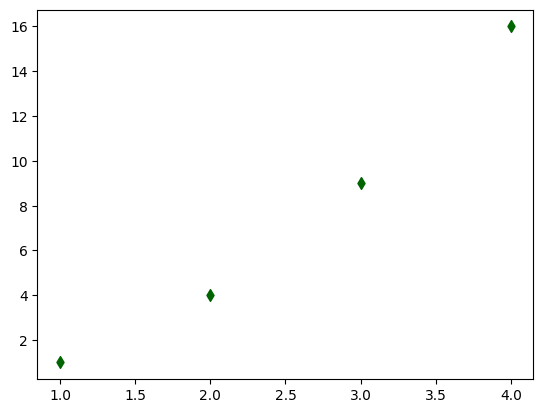

In [3]:
plt.scatter([1, 2, 3, 4], [1, 4, 9, 16], color='darkgreen', marker='d')
plt.show() # You can also use "plt.show()"" or the shortcut ";" to show plots

### Line Plot

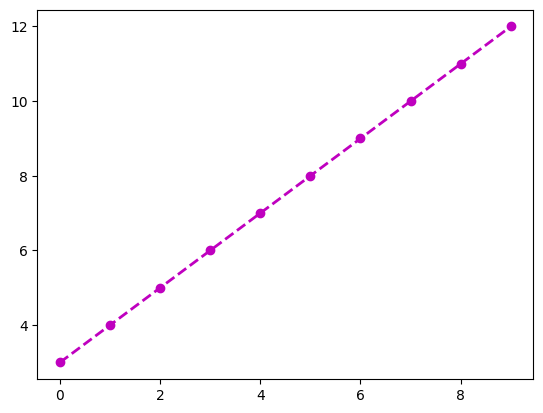

In [4]:
import numpy as np
x = np.arange(10)
y = x + 3

plt.plot(x, y, 'o--m', linewidth=2);


## 3. Formatting plots

#### Fasttest way
In the expression `plot([x], y, [fmt])`, the optional parameter fmt is a convenient way for defining basic formatting like color, marker and linestyle. It's a shortcut string notation.

https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

A format string consists of a part for color, marker and line:  
`[fmt]` = `'[marker][line][color]'`. Each of them is optional.     
For example, in the plot above:  
`'o'`: Circle marker  
`'--'`: Dashed line style  
`'m'`: Color magenta

#### Explicit formating parameters
Explicit formating provides many, many more options to control for all characteristics of custom colors, symbols etc, and can be mixed with the fmt shortcut notation parameter too. See example below:

In [ ]:
z = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(z, np.cos(z), 'o-', color = [0.3,0,0.6])
plt.xlabel('z')
plt.ylabel('cos(z)')
plt.title('Cosine function'); 


## 4. Vizualizing multiple curves on a same plot
The fast formating notation is valid for multiples lines/points on the same plot: 

`plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)`

In [ ]:
x = np.arange(10)
plt.plot(x, x, 'm-.', x, x+3, 'cv' , x, -x+5);


## 5. Creating multiple sub-plots on a same canvas with `subplots`

https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html
https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html?highlight=creating%20multiple%20subplots%20using%20plt%20subplots

### Using MatplotLib's stateful/implicit figure object

In [ ]:
x = np.arange(10)
y1 = x
y2 = x**2 - 3
y3 = -x**3 + 2*x**2

plt.figure(figsize = [6,12]) # Control the size of the figure
plt.subplot(3, 1, 1)
plt.plot(x, y1, 'm-.')

plt.subplot(3, 1, 2)
plt.plot(x, y2, 'cv')

plt.subplot(3, 1, 3)
plt.plot(x, y3)
plt.show()


### Using Matplotlib's Object Oriented approach

#### The same example with the OO approach

In [ ]:
# Create new instances of figure and axes objects assigned to custom variable names
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = [6, 12])

# Add contents and parameters to each axis of the figure 
axes[0].plot(x, y1, 'm-.')
axes[1].plot(x, y2, 'cv')
axes[2].plot(x, y3);

#### Combine some of the many functionalities of MatplotLib to design awesome figures!

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(z, np.cos(z), color = [0.3,0,0.6], linewidth = 5)
axes[0].plot(z, np.sin(z), 'k--')
axes[0].set(xlim=[-7,7], ylim=[-2,2], title='Cosine', xlabel='z', ylabel='cos(z)')

axes[1].plot(z, np.sin(z), 'k--', linewidth = 5)
axes[1].plot(z, np.cos(z), color = [0.3,0,0.6])
axes[1].set(xlim=[-7,7], ylim=[-2,2], title='Sine', xlabel='z', ylabel='sin(z)')

f.tight_layout()

### We can always add plots we hadn't planed for when creating the original canvas

In [ ]:
# Additional plots we hadn't plan for when creating the original canvas
a3 = f.add_axes([0.13, 1, 0.36, 0.2]) 
a3.plot(z, np.tan(z), 'w')
a3.set_facecolor((0.3,0,0.6))
a3.xaxis.set_ticklabels([])
a3.set(ylabel='tan(z)');

a4 = f.add_axes([0.615, 1, 0.36, 0.2]) 
a4.plot(z, np.tan(z), 'w')
a4.set_facecolor((0.3,0,0.6))
a4.xaxis.set_ticklabels([])

f

#### Save figure object to file

In [ ]:
f.savefig("TodaysDesign.png")

## Histogram
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html
Returns a tuple (n, bins, patches) containing the values of the histogram,
the edges of the bins, and a list of patches

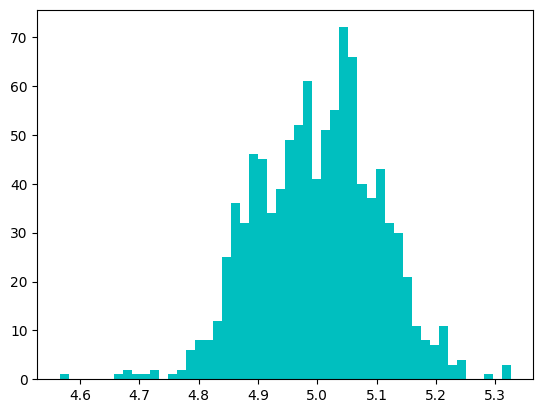

In [6]:
# Sample a normal distribution with mean = 5 and standard deviation = 0.1
mu, sigma = 5, 0.1 
d = np.random.normal(mu, sigma, 1000)

# Plot its histogram
f = plt.hist(d, bins = 50, color = 'c')

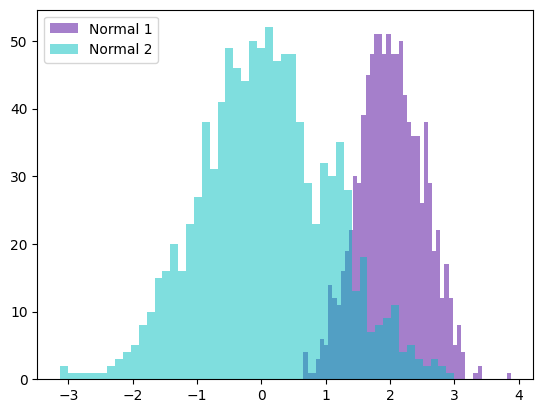

In [7]:
# Sample two normal distributions
m1, s1 = 2, 0.5 
d1 = np.random.normal(m1, s1, 1000)
m2, s2 = 0, 1 
d2 = np.random.normal(m2, s2, 1000)

# Vizualize multiple data distribtions
f, ax = plt.subplots()
ax.hist(d1, bins=50, alpha = 0.5, label = 'Normal 1', color = [0.3,0,0.6])
ax.hist(d2, bins=50, alpha = 0.5, label = 'Normal 2', color = 'c')

# Show the legend
ax.legend(loc="upper left");

## Exercise 1
###  Vizualize two trigonometric functions  and save to file:

$y_1(t)=\cos(4t)$ defined in the interval $[0.01,3]$

$y_2(t)=\sin(5\pi t)$ defined in the interval $[0.01,3]$

1. Generate one plot of y1 in red and y2 in blue in the interval $[0.01,3]$ using 200 points  
2. Overlay a small insert plot zooming in the region $t=[0.1, 2.0]$  
3. On the main plot, add a plot title, x label, y label and legends for each functions
4. Save this figure to a file
4. Generate two subplots of y1 and y2, each with its own title and axis labels 
5. Save this other figure to a file

## Exercise 2

Load the data from the CSV file provided in Lab 01 (filename `MedicalData.csv`), then create a figure object and vizualise the data as a heat map. To create a heat map you can use the command `f = plt.imshow(data)`, or `ax.imshow(data)` if `ax` is an axes object on a PyPlot figure object. A heat map will let you vizualize the evolution over time of the number of inflammation flare-ups for the 60 patients enrolled in the clinical trial, over 40 days, all simultaneously. What patterns do you see?

For more details and guidance, click here: https://swcarpentry.github.io/python-novice-inflammation/03-matplotlib/index.html

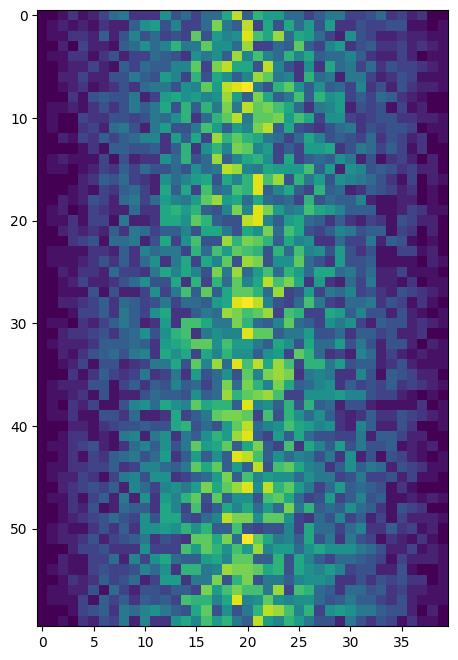

In [5]:
# Solution:
data = np.loadtxt(fname='MedicalData.csv', delimiter=',')
f , ax = plt.subplots(figsize = (8,8)) 
ax.imshow(data);

## **Thank you everyone!**